In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
table = pd.read_csv('consolidado.csv')
table.head()
#vsm x =valor del salario minimo febrero
#vsm y =valor del salario enero

,key,vsm_actual_x,SaldoInsolutoActual_x,PagosVencidosMeses_x,vsm_actual_y,SaldoInsolutoActual_y,PagosVencidosMeses_y,estado
0,0,2686.144,204.43,0,2686.144,203.19,0,Jalisco
1,1,2686.144,42.63,0,2686.144,42.78,0,Jalisco
2,2,2686.144,189.87,0,2686.144,190.63,0,Jalisco
3,3,2686.144,51.81,0,2686.144,52.00,0,Jalisco
4,4,2686.144,197.55,0,2686.144,194.85,0,Jalisco


In [2]:
table.columns


Index(['key', 'vsm_actual_x', 'SaldoInsolutoActual_x', 'PagosVencidosMeses_x',
       'vsm_actual_y', 'SaldoInsolutoActual_y', 'PagosVencidosMeses_y',
       'estado'],
      dtype='object')

In [3]:
table["vsm_enero"] = table["vsm_actual_y"]
table["vsm_febrero"] = table["vsm_actual_x"]
table["PagosVencidos_enero"] = table["PagosVencidosMeses_y"]
table["PagosVencidos_febrero"] = table["PagosVencidosMeses_x"]
table["RemainingDebt_enero"] = table["SaldoInsolutoActual_y"]
table["RemainingDebt_febrero"] = table["SaldoInsolutoActual_x"]

Table = table[["key", "vsm_enero", "vsm_febrero", "PagosVencidos_enero", "PagosVencidos_febrero", "RemainingDebt_enero", "RemainingDebt_febrero", "estado"]]
Table.head()


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco


In [4]:
Estados = Table["estado"].value_counts()
#print(Estados)
#print(len(Estados))

In [5]:
Table["PagosVencidos_enero"].value_counts()

0    16856
1     1289
2      248
3       53
Name: PagosVencidos_enero, dtype: int64

In [6]:
Table["PagosVencidos_febrero"].value_counts()

0    16509
1     1490
2      344
3       72
4       31
Name: PagosVencidos_febrero, dtype: int64

In [7]:
PagosVencidos_dos = Table["PagosVencidos_enero"] - Table["PagosVencidos_febrero"]
PagosVencidos_dos.value_counts()

 0    16636
-1     1223
 1      535
 2       42
 3       10
dtype: int64

In [8]:
Table.head()

,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco


In [9]:
Table["saldo_pesosE"] = Table["vsm_enero"]*Table["RemainingDebt_enero"]
Table["saldo_pesosF"] = Table["vsm_febrero"]*Table["RemainingDebt_febrero"]
Table["DueDaysE"] = Table["PagosVencidos_enero"]*30
Table["DueDaysF"] = Table["PagosVencidos_febrero"]*30
Table.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0


In [10]:
Table["DueDaysE"].value_counts()

0     16856
30     1289
60      248
90       53
Name: DueDaysE, dtype: int64

In [11]:
Table["DueDaysF"].value_counts()

0      16509
30      1490
60       344
90        72
120       31
Name: DueDaysF, dtype: int64

In [12]:
len(Table)

18446

In [13]:
Performance_Stay = Table.loc[Table["DueDaysE"] == Table["DueDaysF"] , :]
Performance_Stay["Performance"] = "stay"
Performance_Stay.head()
#Performance_Stay.count()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,stay
1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,stay
2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,stay
3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,stay
4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,stay


In [14]:
Performance_Rol = Table.loc[Table["DueDaysE"] < Table["DueDaysF"] , :]
Performance_Rol["Performance"] = "Rol"
Performance_Rol.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
9,9,2686.144,2686.144,0,1,114.24,115.02,Jalisco,306865.09056,308960.28288,0,30,Rol
13,13,2686.144,2686.144,1,2,166.01,166.58,Jalisco,445926.76544,447457.86752,30,60,Rol
17,17,2686.144,2686.144,0,1,102.93,102.08,Jalisco,276484.80192,274201.57952,0,30,Rol
24,24,2686.144,2686.144,0,1,77.36,77.09,Jalisco,207800.09984,207074.84096,0,30,Rol
30,30,2686.144,2686.144,0,1,128.72,129.51,Jalisco,345760.45568,347882.50944,0,30,Rol


In [15]:
Performance_Cure = Table.loc[Table["DueDaysE"] > Table["DueDaysF"] , :]
Performance_Cure["Performance"] = "Cure"
Performance_Cure.head()

C:\Users\justi\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
45,45,2686.144,2686.144,1,0,94.21,93.01,Jalisco,253061.62624,249838.25344,30,0,Cure
77,77,2686.144,2686.144,1,0,92.44,91.08,Jalisco,248307.15136,244653.99552,30,0,Cure
85,85,2686.144,2686.144,1,0,189.04,181.20,San Luis Potosi,507788.66176,486729.29280,30,0,Cure
211,211,2686.144,2686.144,1,0,127.18,123.16,San Luis Potosi,341623.79392,330825.49504,30,0,Cure
277,277,2686.144,2686.144,1,0,139.98,139.32,San Luis Potosi,376006.43712,374233.58208,30,0,Cure


In [16]:
PerformanceT = [Performance_Stay, Performance_Rol, Performance_Cure]
result = pd.concat(PerformanceT).reset_index()
result.head()
#len(result)

,index,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance
0,0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,545797.59936,549128.41792,0,0,stay
1,1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,114913.24032,114510.31872,0,0,stay
2,2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,512059.63072,510018.16128,0,0,stay
3,3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,139679.48800,139169.12064,0,0,stay
4,4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,523395.15840,530647.74720,0,0,stay


In [17]:
result["Performance"].value_counts()

stay    16636
Rol      1223
Cure      587
Name: Performance, dtype: int64

In [18]:
result.dtypes


index                      int64
key                        int64
vsm_enero                float64
vsm_febrero              float64
PagosVencidos_enero        int64
PagosVencidos_febrero      int64
RemainingDebt_enero      float64
RemainingDebt_febrero    float64
estado                    object
saldo_pesosE             float64
saldo_pesosF             float64
DueDaysE                   int64
DueDaysF                   int64
Performance               object
dtype: object

In [19]:
result["jump"] = result["DueDaysF"] - result["DueDaysE"]
result


,index,key,vsm_enero,vsm_febrero,PagosVencidos_enero,PagosVencidos_febrero,RemainingDebt_enero,RemainingDebt_febrero,estado,saldo_pesosE,saldo_pesosF,DueDaysE,DueDaysF,Performance,jump
0,0,0,2686.144,2686.144,0,0,203.19,204.43,Jalisco,5.457976e+05,5.491284e+05,0,0,stay,0
1,1,1,2686.144,2686.144,0,0,42.78,42.63,Jalisco,1.149132e+05,1.145103e+05,0,0,stay,0
2,2,2,2686.144,2686.144,0,0,190.63,189.87,Jalisco,5.120596e+05,5.100182e+05,0,0,stay,0
3,3,3,2686.144,2686.144,0,0,52.00,51.81,Jalisco,1.396795e+05,1.391691e+05,0,0,stay,0
4,4,4,2686.144,2686.144,0,0,194.85,197.55,Jalisco,5.233952e+05,5.306477e+05,0,0,stay,0
5,5,5,2686.144,2686.144,0,0,328.79,326.04,Jalisco,8.831773e+05,8.757904e+05,0,0,stay,0
6,6,6,2686.144,2686.144,0,0,175.42,174.66,Jalisco,4.712034e+05,4.691619e+05,0,0,stay,0
7,7,7,2686.144,2686.144,0,0,258.76,257.70,Jalisco,6.950666e+05,6.922193e+05,0,0,stay,0
8,8,8,2686.144,2686.144,0,0,405.85,408.41,Jalisco,1.090172e+06,1.097048e+06,0,0,stay,0
9,10,10,2686.144,2686.144,0,0,69.51,68.46,Jalisco,1.867139e+05,1.838934e+05,0,0,stay,0


In [20]:
result["jump"].value_counts()

 0     16636
 30     1223
-30      535
-60       42
-90       10
Name: jump, dtype: int64

In [21]:
# analyze past due days, ok use duedays.
result['PagosVencidos_enero'].value_counts()
result['PagosVencidos_febrero'].value_counts()


0    16509
1     1490
2      344
3       72
4       31
Name: PagosVencidos_febrero, dtype: int64

In [22]:
# indentify 90+ to determine bad rate
result['pay_nopay'] = np.where(result['DueDaysF']>=90, 1, 0)
result['pay_nopay'].value_counts()

0    18343
1      103
Name: pay_nopay, dtype: int64

In [23]:
# group by economical zones = 8 since there are different sizes better group this way
#source https://es.wikipedia.org/wiki/Anexo:Zonas_econ%C3%B3micas_de_M%C3%A9xico

zn = {'Baja California': 'NOR', 'Baja California Sur': 'NOR', 'Chihuahua': 'NOR', 'Durango': 'NOR','Sinaloa':'NOR','Sonora':'NOR',
       'Coahuila': 'NES', 'Nuevo Leon': 'NES', 'Tamaulipas': 'NES',
      'Colima': 'OCC', 'Jalisco': 'OCC', 'Michoacan': 'OCC', 'Nayarit': 'OCC',
       'Hidalgo': 'ORI', 'Puebla': 'ORI', 'Tlaxcala': 'ORI', 'Veracruz': 'ORI',
      'Aguascalientes': 'CNO', 'Guanajuato': 'CNO', 'Queretaro': 'CNO', 'San Luis Potosi': 'CNO','Zacatecas': 'CNO',
      'Ciudad de Mexico': 'CSU', 'Estado de Mexico': 'CSU', 'Morelos': 'CSU',
      'Chiapas': 'SUO', 'Guerrero': 'SUO', 'Oaxaca': 'SUO',
      'Campeche': 'SUE','Quintana Roo': 'SUE', 'Tabasco': 'SUE', 'Yucatan': 'SUE'
     }

result['zone'] = result['estado'].map(zn)
result['zone'].value_counts()




NOR    4870
NES    2921
OCC    2822
CSU    2448
CNO    2011
ORI    1164
SUE    1115
SUO     687
Name: zone, dtype: int64

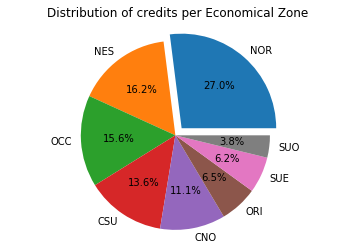

In [24]:
#plot distribution by economical zone
#pending how to get with value_counts

import matplotlib.pyplot as plt
%matplotlib inline
#NOR    4870
#NES    2921
#OCC    2822
#CSU    2448
#CNO    2011
#ORI    1164
#SUE    1115
#SUO     687
labels = 'NOR', 'NES', 'OCC', 'CSU','CNO','ORI','SUE','SUO'
sizes = [4870, 2921, 2822, 2448, 2011, 1164,1115,687]
#colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0, 0,0,0,0,0)
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#autopct='%1.1f%%', shadow=True, startangle=90)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of credits per Economical Zone')
plt.show()

In [25]:
#analyze bad rate per entity
#make groups by entity

res_stat=result.groupby('estado')['pay_nopay'].agg(['sum', 'count'])
res_stat_DF=pd.DataFrame(res_stat).reindex()
#res_stat_DF.rename(columns={'sum':'bad','count':'total'}) #ver porque no sirve
res_stat_DF.rename(columns={'sum':'pay_nopay','count':'total'}) #ver porque no sirve
res_stat_DF['nopay_rate']=round((res_stat_DF['sum']/res_stat_DF['count'])*100,2)
res_stat_DF.reset_index()

,estado,sum,count,nopay_rate
0,Aguascalientes,0,161,0.00
1,Baja California,11,1985,0.55
2,Baja California Sur,3,579,0.52
3,Campeche,1,24,4.17
4,Chiapas,1,197,0.51
5,Chihuahua,2,979,0.20
6,Coahuila,1,409,0.24
7,Colima,0,60,0.00
8,Distrito Federal,4,408,0.98
9,Durango,1,52,1.92


In [26]:
#plot bad rate per state
res_stat_DF.head()
res_stat_DF.reset_index()
#res_stat_DF.set_index('estado')
res_stat_DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Aguascalientes to Zacatecas
Data columns (total 3 columns):
sum           32 non-null int32
count         32 non-null int64
nopay_rate    32 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 896.0+ bytes


In [47]:
#transition matriz payments  (using CROSSTAB)
#group by payment january &February then cross table#Transition Matriz for payment jan vs. Feb to see migration#"result.pivot_table(index=['PagosVencidos_enero'],columns=['PagosVencidos_febrero'],aggfunc='count')
mx = result[['PagosVencidos_enero','PagosVencidos_febrero','key']]
pv_gpos=mx.groupby(['PagosVencidos_enero','PagosVencidos_febrero']).count().reset_index() #esto permite conservar las columnas, si no las pierde
#pv_gpos_DF=pd.DataFrame(pv_gpos)
#pv_gpos_DF.reset_index()  #eso es lo que necesitaba..y lo que pone los pagos en cada fila
pv_gpos.dtypes # con reset no se requiere dataframe nuevo
#pv_gpos
matrix_pv=pd.crosstab(pv_gpos['PagosVencidos_enero'],pv_gpos['PagosVencidos_febrero'],values=pv_gpos['key'], aggfunc="sum",margins=True)
matrix_pv

PagosVencidos_febrero,0,1,2,3,4,All
PagosVencidos_enero,,,,,,
0,15975.0,881.0,NaN,NaN,NaN,16856
1,484.0,562.0,243.0,NaN,NaN,1289
2,40.0,45.0,95.0,68.0,NaN,248
3,10.0,2.0,6.0,4.0,31.0,53
All,16509.0,1490.0,344.0,72.0,31.0,18446


In [48]:
#Matrix with percentages a columns..
matrix_pv_per=pd.crosstab(pv_gpos['PagosVencidos_enero'],pv_gpos['PagosVencidos_febrero'], values=pv_gpos['key'], aggfunc=np.sum,normalize='columns').apply(lambda x: x/x.sum()).applymap(lambda x: "{:.0f}%".format(100*x))
matrix_pv_per
# now get percentages as rows..so we will see migration from january to February
matrix_pv_per=pd.crosstab(pv_gpos['PagosVencidos_enero'],pv_gpos['PagosVencidos_febrero'], values=pv_gpos['key'], aggfunc=np.sum,normalize='index',margins=True)
matrix_pv_per
#explain percentages in presentation...

PagosVencidos_febrero,0,1,2,3,4
PagosVencidos_enero,,,,,
0,0.947734,0.052266,0.000000,0.000000,0.000000
1,0.375485,0.435997,0.188518,0.000000,0.000000
2,0.161290,0.181452,0.383065,0.274194,0.000000
3,0.188679,0.037736,0.113208,0.075472,0.584906
All,0.894991,0.080776,0.018649,0.003903,0.001681


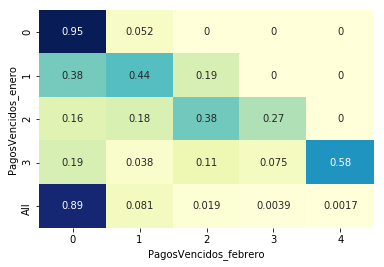

In [49]:
#Show heatmap to easily read results in percentages
import seaborn as sns
#sns.heatmap(matrix_pv_per.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),cmap="YlGnBu", annot=True, cbar=False)
sns.heatmap(matrix_pv_per,cmap="YlGnBu", annot=True, cbar=False)

In [29]:
#CNBV Banking portfolio composition vs BBVA - Mortgage credits
#add source
cnbv=pd.read_csv('cartera_comparaCNBV.csv')
#cnbv_DF=pd.DataFrame(cnbv_balance)
cnbv['STot']=cnbv['sdo_total'].astype(int)
cnbv['SVig']=cnbv['sdo_vigente'].astype(int)
cnbv['SVen']=cnbv['sdo_vencido'].astype(int)
cnbv['NTot']=cnbv['num_total'].astype(int)
cnbv['NVig']=cnbv['num_vigente'].astype(int)
cnbv['NVen']=cnbv['num_vencida'].astype(int)
del cnbv['sdo_total']
del cnbv['sdo_vigente']
del cnbv['sdo_vencido']
del cnbv['num_total']
del cnbv['num_vigente']
del cnbv['num_vencida']
cnbv_DF=pd.DataFrame(cnbv)
cnbv_DF

#calculate imor Banking (total) - mortgages
cnbv_DF['Per_IMOR']=round(((cnbv_DF.SVen)/(cnbv_DF.STot))*100,2)
cnbv_DF['Num_IMOR']=round(((cnbv_DF.NVen)/(cnbv_DF.NTot))*100,2)
cnbv_DF



,periodo,institucion,STot,SVig,SVen,NTot,NVig,NVen,Per_IMOR,Num_IMOR
0,201905,BBVA,204014539,197789091,6225448,301448,291944,9504,3.05,3.15
1,201904,BBVA,201796632,195593847,6202785,300504,290999,9505,3.07,3.16
2,201903,BBVA,200486990,194968556,5518433,299980,291623,8357,2.75,2.79
3,201902,BBVA,198194871,192212966,5981905,298869,289636,9233,3.02,3.09
4,201901,BBVA,198194871,192212966,5981905,298869,289636,9233,3.02,3.09
5,201812,BBVA,194593012,188874438,5718574,298135,288902,9233,2.94,3.10
6,201811,BBVA,193111196,187327592,5783605,297885,288521,9364,2.99,3.14
7,201810,BBVA,191460075,185847137,5612938,297273,288174,9099,2.93,3.06
8,201809,BBVA,190336865,184952667,5384198,297606,288887,8719,2.83,2.93
9,201808,BBVA,188540135,182631116,5909019,296878,287112,9766,3.13,3.29


In [30]:
imor_bbva=cnbv_DF.loc[cnbv_DF['institucion']=='BBVA', ['periodo','Per_IMOR']].reindex()
imor_bbva
imor_banking=cnbv_DF.loc[cnbv_DF['institucion']=='BM', ['periodo','Per_IMOR']].reset_index()
imor_banking
une_imor=pd.merge(imor_bbva, imor_banking, on='periodo', how='inner')
del une_imor['index']
une_imor

#Banco1

,periodo,Per_IMOR_x,Per_IMOR_y
0,201905,3.05,2.52
1,201904,3.07,2.48
2,201903,2.75,2.40
3,201902,3.02,2.48
4,201901,3.02,2.42
5,201812,2.94,2.41
6,201811,2.99,2.40
7,201810,2.93,2.34
8,201809,2.83,2.35
9,201808,3.13,2.42


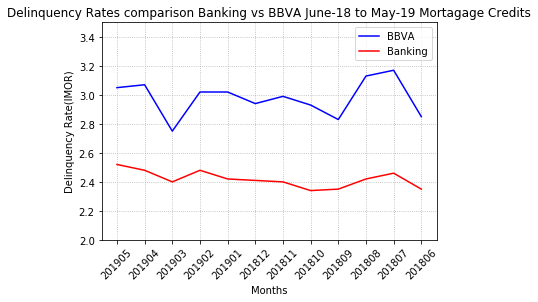

In [35]:
#plot tendencies Banking vs BBVA
x_axis=une_imor.Per_IMOR_x   #BBVA = x
x_axis2=une_imor.Per_IMOR_y
#y_axis=une_imor.periodo
plt.grid(linestyle='dotted')
plt.plot(x_axis,'-b', label='BBVA')
plt.plot(x_axis2,'r', label='Banking')
#graph=plt.bar(y_axis,height, align='center', alpha=0.9, color='r')

#plt.yticks(np.arange(0, 11, 1)) 

plt.title('Delinquency Rates comparison Banking vs BBVA June-18 to May-19 Mortagage Credits')
plt.xlabel('Months')
plt.ylabel('Delinquency Rate(IMOR)')
plt.legend(loc='best')
plt.ylim(2,3.5)
tick_location=[0,1,2,3,4,5,6,7,8,9,10,11]

plt.xticks(tick_location,une_imor['periodo'],rotation=45)
plt.show()

In [36]:
#anova: Bad rate depends on state
#    Ho. Bad Rate is equal in every state
#    H1 Bad rate behaves equal.. doesnt depends on states
# Etract individual groups per state


# Perform the ANOVA
#stats.f_oneway(asian, black, hispanic, other, white)

In [37]:
#plot balances, number of credits.. descriptive..
#stats median max mode.. etc archi richie

In [38]:
#inegiAPI National... see code to add here
#unemployment INEGI
desempleo=pd.read_csv('TasaDesempleoINEGI.csv')
desempleo


,periodo,Tasa_Desempleo
0,201806,3.385276
1,201807,3.477639
2,201808,3.468524
3,201809,3.600373
4,201810,3.238394
5,201811,3.263466
6,201812,3.354495
7,201901,3.567754
8,201902,3.299432
9,201903,3.245443


In [39]:
#join with CNBV del to find correlation
employ_delq=pd.merge(une_imor, desempleo, on='periodo', how='inner')
employ_delq

,periodo,Per_IMOR_x,Per_IMOR_y,Tasa_Desempleo
0,201905,3.05,2.52,3.512135
1,201904,3.07,2.48,3.499594
2,201903,2.75,2.40,3.245443
3,201902,3.02,2.48,3.299432
4,201901,3.02,2.42,3.567754
5,201812,2.94,2.41,3.354495
6,201811,2.99,2.40,3.263466
7,201810,2.93,2.34,3.238394
8,201809,2.83,2.35,3.600373
9,201808,3.13,2.42,3.468524


In [40]:
#correlation 
corr_BBVAvsEmp=employ_delq['Per_IMOR_x'].corr(employ_delq['Tasa_Desempleo'])
corr_BKvsEmp=employ_delq['Per_IMOR_y'].corr(employ_delq['Tasa_Desempleo'])
corr_btw_bk=employ_delq['Per_IMOR_y'].corr(employ_delq['Per_IMOR_x'])
corr_BBVAvsEmp,corr_BKvsEmp,corr_btw_bk

#explain why BBVA is higher correlated with unemployment
#between BBVA and all banking exist higher correlation.... explained with market share


(0.34349478873421907, 0.2547889236091892, 0.6477799975191945)

In [41]:
#hypothesis  BBVA bad rate explained with umeployment . 
# alpha = 5% or 0.05  significance Chi-Square Test
#Ho Mortgage Bad Rate is not explained with unemployment rate  BBVA
#H1 Mortgage Bad Rate is  explained with unemployment rate

from scipy.stats import ttest_ind

ttest_BBVAvsEmp=stats.ttest_ind(employ_delq.Per_IMOR_x,employ_delq.Tasa_Desempleo, equal_var = False)
ttest_BBVAvsEmp

#since pvalue <.05 then reject H0 and Accept H1

Ttest_indResult(statistic=-8.321640401205627, pvalue=3.0690778661099126e-08)

In [42]:
#hypothesis  BBVA bad rate explained with umeployment . 
# alpha = 5% or 0.05  significance Chi-Square Test
#Ho Mortgage Bad Rate is not explained with unemployment rate  BBVA
#H1 Mortgage Bad Rate is not explained with unemployment rate

ttest_BKvsEmp=stats.ttest_ind(employ_delq.Per_IMOR_y,employ_delq.Tasa_Desempleo, equal_var = False)
ttest_BKvsEmp

#since pvalue <.05 then reject H0 and Accept H1

Ttest_indResult(statistic=-24.40020452601373, pvalue=1.3400134349967048e-13)

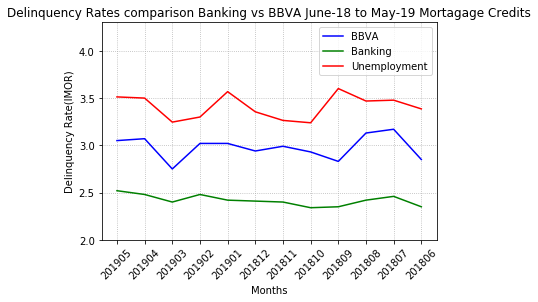

In [45]:
#plot tendencies Banking vs BBVA
x_axis=employ_delq.Per_IMOR_x   #BBVA = x
x_axis2=employ_delq.Per_IMOR_y
x_axis3=employ_delq.Tasa_Desempleo
#y_axis=une_imor.periodo
plt.grid(linestyle='dotted')
plt.plot(x_axis,'-b', label='BBVA')
plt.plot(x_axis2,'g', label='Banking')
plt.plot(x_axis3,'r', label='Unemployment')
#graph=plt.bar(y_axis,height, align='center', alpha=0.9, color='r')

#plt.yticks(np.arange(0, 11, 1)) 

plt.title('Delinquency Rates comparison Banking vs BBVA June-18 to May-19 Mortagage Credits')
plt.xlabel('Months')
plt.ylabel('Delinquency Rate(IMOR)')
plt.legend(loc='best')
plt.ylim(2,4.3)
tick_location=[0,1,2,3,4,5,6,7,8,9,10,11]

plt.xticks(tick_location,une_imor['periodo'],rotation=45)
plt.show()